###### The Curse of Dimensionality
We are so used to living in 3 dimensions that our intuition fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard to picture in our mind (below image)

<img src="images/curseOfDims.png">

It turns out that many things behave very differently in high-dimensional space and as the dimensions in our data set increase, the number of samples required for an estimator to generalize also increase exponentially. And so problems involving high dimensional data become victims of **Curse of Dimensionality**

But it's not always feasible to to acquire such large data sets and at the same time learning from those data sets requires more memory and processing power.

Eventually the sparseness of the data also increases with its dimensions. With this it becomes even harder for the estimator to detect similar instances in a higher dimensional space as all of the data points are similarly sparse.

**Example**: If you pick two points randomly in a **unit square**, the distance between these two points will be, on average, roughly **0.52**. If you pick two random points in a **unit 3D cube**, the average distance will be roughly **0.66**. But what about two points picked randomly in a **one-million-dimensional hypercube**? Well the average distance, will be about **408.25**

$$(roughly \sqrt{1, 000, 000/6})! $$

This is quite counter-intuitive, how can two points be so far apart when they both lie within the same unit hypercube? This fact implies that highdimensional datasets are at risk of being very sparse, most training data points are likely to be very far away from each other. Of course this also means that a new instance will also be far away from training set, making predictions much less promising than in lower dimensional space, as they will be exploited by the curse of dimensionality.

Since increasing number of records is not possible in every case, we try to reduce the number of dimensions in the data to simplify our data.

**Note**:Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality) so even though it will speed up training, it may also make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using reducing dimensionality if training is too slow. In some cases however,
reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t, it will just speed up training).

We have two main approaches for dimensionality reduction:
- projection
- manifold learning

**Projection**
In majority of the use cases data points are not spread out uniformly across the entire feature space. Most of them are constant or are highly correlated. Hence the data points lie within a much lower dimensional sub-space of the entire high dimensional space.
<img src="images/projection1.png" height=600 width=600>

Here we can see that all the data points are lying close to plane(which is a 2D sub space of the 3D space). But if we project those same points on to a place of the axis, 

<img src="images/projection2.png" height=600 width=600>

**Principal Component Analysis**<br>
Based on this intuition an approach named Principal Component Analysis (PCA) is devised. First it identifies the hyperplane that lies closest to the data, then it projects the data onto it. PCA rotates the data in such a way that the features become statistically uncorrelated inorder to make the data align with its principal components to maximize the variance. 

And this rotation is often followed by selecting only a subset of the newly found features on the basis of how highly those features are correlated with the target variable. The newly derived lower-dimensional data will preserve as much of the variance of the original data as possible.

In general, an n-dimensional dataset can be reduced by projecting the dataset onto a k-dimensional subspace, where k is less than n. More formally, PCA can be used to find a set of vectors that span a subspace, which minimizes the sum of the squared errors of the projected data. This projection will retain the greatest proportion of the original data set's variance.

**Example**

Let's assume that we have a data set as follows,
<img src="images/pca1.png">

The data points approximately form a long and thin ellipse as they move away from origin to the top right of the plot. To reduce the dimensions in the data, we have to project those points onto a line. 

Following image shows two lines to project the data. 
<img src="images/pca2.png">

Data varies more across the dashed line when compared to the dotted line. So, the dashed line becomes the first principal component. The second principal component must be orthogonal to the first one. In other terms the second principal component must be independent and appears perpendicular to the first principal component. And following image explains that,
<img src="images/pca3.png">

If we have a 3D data, the data should be rotated with respect to one of the axes. So that we end up with a dimension that has zero variance and we can then discard that dimension.

<img src="images/pca4.png">

PCA is most useful when the variance in a data set is distributed unevenly across the dimensions. Like a three-dimensional data set with a spherical convex hull. PCA cannot be used effectively with this data set because there is equal variance in each dimension; none of the dimensions can be discarded without losing a significant amount of information.

###### Variance, Covariance and Covariance Matrices
**variance** is a measure of how a set of values are spread out. Variance is calculated as the average of the squared differences of the values and mean of the values.
$$s^2 = \frac{\sum_{i=1}^n(X_i-{\overline{X}})^2}{n-1}$$

**Covariance** is a measure of how much two features change together. It is a measure of the linear relationship between two variables. Co-variance is similar to the correlation between two variables but unlike correlation the values of co-variance are not standardized values vary with data and can range from positive infinity to negative infinty, because of which co-variance cannot say the strength or degree of correlation. 

But co-variance can say the direction of correlation, positive co-variance implies positive correlation and negative covariacne includes negative correlation and if the covariance of two features is zero, the variables are uncorrelated. 

**Note:** Uncorrelated variables are not necessarily independent, as covariance is only a measure of linear dependence.

$$Cov(X, Y) = \frac{\sum_{i=1}^n(X_i - \overline{X})(Y_i - \overline{Y})}{n-1}$$

If the covariance is nonzero, the sign indicates whether the variables are positively or negatively correlated. When two variables are positively correlated, one increases as the other increases. When variables are negatively correlated, one variable decreases relative to its mean as the other variable increases relative to its mean.

A covariance matrix describes the covariance values between each pair of features/variables/dimensions in a data set. The element **(i, j)** indicates the covariance of the **ith** and **jth** dimensions of the data. For example, a covariance matrix for a three-dimensional data is given by the following matrix,

$$C = \begin{bmatrix}cov(x_1, x_1) & cov(x_1, x_2) & cov(x_1, x_3) \\cov(x_2, x_1) & cov(x_2, x_2) & cov(x_2,x_3) \\ cov(x_3,x_1) & cov(x_3, x_2) & cov(x_3, x_3) \end{bmatrix}$$

In [2]:
import numpy as np
X = np.array([[2, 0, -1.4], [2.2, 0.2, -1.5], [2.4, 0.1, -1], [1.9, 0, -1.2]])
print(X.mean(axis = 0))
print (np.cov(X.T))

[ 2.125  0.075 -1.275]
[[ 0.04916667  0.01416667  0.01916667]
 [ 0.01416667  0.00916667 -0.00583333]
 [ 0.01916667 -0.00583333  0.04916667]]


###### Eigenvectors and Eigenvalues
A vector is described by a direction and magnitude, or length. An eigenvector of a matrix is a non-zero vector that satisfies the following equation,

$$A\vec{v}=\lambda\vec{v} -------------------- (1)$$ 

In the preceding equation, A is a square matrix
$$\vec{v} \space is \space an \space eigenvector$$
$$\lambda \space is \space a \space scalar \space called \space an \space eigenvalue.$$ 

The direction of an eigenvector remains the same after it has been transformed by A, only its magnitude changes, as indicated by the eigenvalue.

That is, multiplying a matrix by one of its eigenvectors is equal to scaling the eigenvector.

Eigenvectors and eigenvalues can only be derived from square matrices, and not all square matrices have eigenvectors or eigenvalues. If a matrix does have eigenvectors and eigenvalues, it will have a pair for each of its dimensions. 

**The principal components of a matrix are the eigenvectors of its covariance matrix**, ordered by their corresponding eigenvalues. The eigenvector with the greatest eigenvalue is the first principal component, the second principal component is the eigenvector with the second greatest eigenvalue, and so on.

**Example**

$$ A = \begin{bmatrix}1 & -2 \\2 & -3 \end{bmatrix}$$

The product of A and any eigenvector of A must be equal to the eigenvector multiplied by its eigenvalue as per eqn(1). We will begin by finding the eigenvalues, which we can find using the following characteristic equations

$$(A-\lambda \space I)\vec{v}=0 ------------------ \space(2)$$

$$A-\lambda I => \begin{bmatrix}1 & -2 \\2 & -3 \end{bmatrix} - \begin{bmatrix}\lambda & 0 \\0 & \lambda\end{bmatrix} = 0$$ 

As per the above equation the difference of the data matrix and the product of eigen value and Identity matrix equals zero.

$$ \begin{vmatrix}1-\lambda & -2 \\2 & -3-\lambda \end{vmatrix} = (\lambda+1)(\lambda+1) = 0$$

Both of the eigenvalues for this matrix are equal to -1. We can now use the eigenvalues to solve the eigenvectors using eqn(2)

$$\left(\begin{bmatrix}1 & -2\\ 2 & -3\end{bmatrix} - {\begin{bmatrix}\lambda & 0 \\0 & -\lambda \end{bmatrix} } \right)\vec{v} = {\begin{bmatrix}1-\lambda & -2 \\2 & -3-\lambda \end{bmatrix}\vec{v} } = {\begin{bmatrix}1-\lambda & -2 \\2 & -3-\lambda \end{bmatrix} \begin{bmatrix}v_{11} \\ v_{12}\end{bmatrix} } $$

We can now substitute eigen values and solve for eigenvectors.
$$\begin{bmatrix}1-(-1)&-2\\2&-3-(-1)\end{bmatrix} \begin{bmatrix}v_{11} \\ v_{12}\end{bmatrix} = \begin{bmatrix}2&-2 \\ 2&-2\end{bmatrix}\begin{bmatrix}v_{11} \\ v_{12}\end{bmatrix} = 0$$

Which transform to be, 
$$2v_{11}+-(2v_{1,2})=0$$
$$2v_{11}+-(2v_{1,2})=0$$

And any non-zero vector that satisfies the preceding equations, such as the following, can be used as an eigenvector

$$\begin{bmatrix}1&-2\\2&-3\end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = -1\begin{bmatrix}1 \\ 1\end{bmatrix}  =\begin{bmatrix}-1 \\ -1\end{bmatrix}$$

PCA requires unit eigenvectors, or eigenvectors that have a length equal to 1. We can normalize an eigenvector by dividing it by its norm, which is given by the following equation

$$||x|| = \sqrt{x_1^2 + x_2^2 + ... + x_n^2} --------------------- \space (3)$$

Hence from eqn(3) 

$$\sqrt{1^2+1^2} = \sqrt2 => \begin{bmatrix}0.70710678118654\\0.70710678118654\end{bmatrix}$$

In [3]:
# just to verify above results
w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print("Eigen Values", w)
print("Eigen Vector",v[0])

Eigen Values [-0.99999998 -1.00000002]
Eigen Vector [0.70710678 0.70710678]


In [22]:
# applying PCA for higher dimensional data
# importing dependencies
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [28]:
data = load_iris()
y = data.target
X = data.data
print(X.shape)

(150, 4)


In [29]:
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

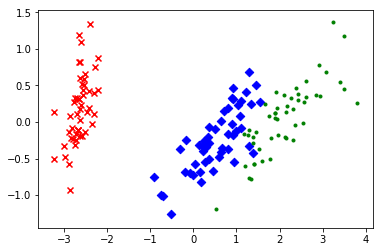

In [30]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

The newly derived features are plotted in the above figure. Each of the dataset's three classes is indicated by its own marker style. From this two-dimensional view of the data, it is clear that one of the classes can be easily separated from the other two overlapping classes. It would be difficult to notice this structure without a graphical representation. This insight can inform our choice of classification model.